# GOT Analysis
### Import packages
This script uses "codecs" for reading the text files; "re" for regular expressions; "collections" for working with tokens; "nltk" for natural language toolkit and "wordcloud" for creating word clouds. 

In [395]:
#% matplotlib inline
import codecs
import re
import copy
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
#from __future__ import division

In [396]:
# Read GOT text files 
with codecs.open("got1.txt", "r", encoding="utf-8") as f:
    got1 = f.read()
with codecs.open("got2.txt", "r", encoding="utf-8") as f:
    got2 = f.read()

### WORD CLOUD

In [397]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
#Generate wordcloud data
wordcloud1 = WordCloud(stopwords=stopwords, max_words=20, \
                      background_color="white").generate(got1)
wordcloud2 = WordCloud(stopwords=stopwords, max_words=20, \
                      background_color="white").generate(got2)

GOT1 Word Cloud


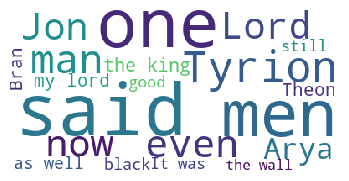

GOT2 Word Cloud


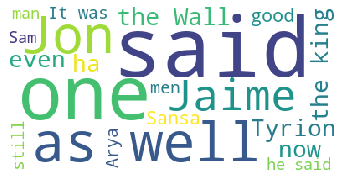

In [398]:
# Display wordclouds
import matplotlib.pyplot as mpLib
print('GOT1 Word Cloud')
mpLib.imshow(wordcloud1)
mpLib.axis("off")
mpLib.show()
print('GOT2 Word Cloud')
mpLib.imshow(wordcloud2)
mpLib.axis("off")
mpLib.show()

###### MOST COMMON WORDS

In [399]:
# We need some specialized functions from NLTK that are not included by default. 
# It is possible to download just the "stopwords" portion but it may be easier to simply download everything in NLTK. 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ellen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [400]:
# Check for English stop words
from nltk.corpus import stopwords
esw = stopwords.words('english')
esw.append("would")

In [401]:
# Filter token using regular expressions
word_pattern = re.compile("^\w+$")

In [402]:
# Token Counter Function
def get_text_counter(text):
    tokens = WordPunctTokenizer().tokenize(PorterStemmer().stem(text))
    tokens = list(map(lambda x: x.lower(), tokens))
    tokens = [token for token in tokens if re.match(word_pattern, token) and token not in esw]
    return collections.Counter(tokens), len(tokens)

Create a function to calculate the absolute frequency and relative frequency of the most common words.

In [403]:
def make_df(counter, size):
    abs_freq = np.array([el[1] for el in counter])
    rel_freq = abs_freq / size
    index = [el[0] for el in counter]
    df = pd.DataFrame(data=np.array([abs_freq, rel_freq]).T, index=index, columns=["Absolute frequency", "Relative frequency"])
    df.index.name = "Most common words"
    return df

In [422]:
# Calculate the most common words in GOT1, then display the 20 most common.
print('GOT 1 most common words')
g1_counter, g1_size = get_text_counter(got1)
make_df(g1_counter.most_common(10), g1_size)

GOT 1 most common words


,Absolute frequency,Relative frequency
Most common words,,
lord,1516.0,0.009149
said,1455.0,0.008781
one,1177.0,0.007103
ser,1148.0,0.006928
could,932.0,0.005625
man,906.0,0.005468
king,817.0,0.004931
men,753.0,0.004544
tyrion,701.0,0.004231


In [405]:
# Save the 1000 most common words of GOT 1 to csv
je_df = make_df(g1_counter.most_common(1000), g1_size)
je_df.to_csv("G1_1000.csv")

In [421]:
# Calculate the most common words of GOT2 then display the 20 most common
print('GOT 2 most common words')
g2_counter, g2_size = get_text_counter(got2)
make_df(g2_counter.most_common(10), g2_size)

GOT 2 most common words


,Absolute frequency,Relative frequency
Most common words,,
said,2273.0,0.010606
lord,1951.0,0.009103
one,1493.0,0.006966
ser,1469.0,0.006854
could,1319.0,0.006154
man,1096.0,0.005114
king,1032.0,0.004815
well,999.0,0.004661
back,988.0,0.004610


Save the 1000 most common words of GOT2 to CSV.

In [407]:
wh_df = make_df(g2_counter.most_common(1000), g2_size)
wh_df.to_csv("G2_1000.csv")

Find the most common words across the two documents.

In [408]:
all_counter = g2_counter + g1_counter
all_df = make_df(g2_counter.most_common(1000), 1)
most_common_words = all_df.index.values

Create a data frame with the word frequency differences.

In [409]:
df_data = []
for word in most_common_words:
    g1_c = g1_counter.get(word, 0) / g1_size
    g2_c = g2_counter.get(word, 0) / g2_size
    d = abs(g1_c - g2_c)
    df_data.append([g1_c, g2_c, d])
dist_df = pd.DataFrame(data=df_data, index=most_common_words,
                       columns=["GOT1 relative frequency", "GOT2 relative frequency",
                                "Relative frequency difference"])
dist_df.index.name = "Most common words"
dist_df.sort_values("Relative frequency difference", ascending=False, inplace=True)

Display the most distinctive words.

In [410]:
dist_df.head(20)

,GOT1 relative frequency,GOT2 relative frequency,Relative frequency difference
Most common words,,,
theon,0.002553,0.000205,0.002348
jaime,0.000682,0.002748,0.002066
said,0.008781,0.010606,0.001824
renly,0.001780,0.000383,0.001398
sam,0.000489,0.001834,0.001345
bran,0.002619,0.001334,0.001285
stannis,0.002342,0.001092,0.001250
jon,0.002939,0.004073,0.001134
tyrion,0.004231,0.003112,0.001118


In [411]:
# Save the full list of distinctive words to a csv entitled got.csv
dist_df.to_csv("GOT.csv")

###### SENTIMENT ANALYSIS

In [412]:
# Import GOT1 file 
with open("got1.txt", 'r',encoding="utf-8") as fh:  
    got1a = fh.readlines()
# Import GOT2 file 
with open("got2.txt", 'r',encoding="utf-8") as fh:  
    got2a = fh.readlines()

In [413]:
#install textblob if not already installed using "pip install -U textblob"
from textblob import TextBlob

In [414]:
# Sentiment Analysis for GOT1 
print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )
for got1line in got1a:
    #Find sentiment of a line
    if (got1line.isspace()) == False and (len(got1line)) > 40: 
        sentiment = TextBlob(got1line)
        #Print individual sentiments
        print('{:40} :   {: 01.2f}    :   {:01.2f}'.format(got1line[:40]\
                , sentiment.polarity, sentiment.subjectivity) )


Review                                   : Polarity   : Subjectivity
This edition contains the complete text  :    0.24    :   0.57
Bantam Spectra hardcover edition publish :    0.00    :   0.00
Bantam Spectra paperback edition / Septe :    0.00    :   0.00
SPECTRA and the portrayal of a boxed “s” :   -0.50    :   0.50
Copyright © 1999 by George R. R. Martin. :    0.00    :   0.00
Library of Congress Catalog Card Number: :    0.00    :   0.00
No part of this book may be reproduced o :    0.00    :   0.00
Bantam Books, the rooster colophon, Spec :   -0.50    :   0.50
The comet’s tail spread across the dawn, :   -0.03    :   0.13
The maester stood on the windswept balco :    0.18    :   0.39
The maester did not believe in omens. An :   -0.04    :   0.46
Such folly. He leaned against the battle :    0.17    :   0.53
And yet . . . and yet . . . the comet bu :   -0.04    :   0.50
“Maester Cressen, we have visitors.” Pyl :    0.33    :   0.50
The old man turned away from the dawn, k :    0.1

“As you will.” Lord Stannis turned away  :    0.29    :   0.40
Too far, Cressen thought dully, looking  :    0.03    :   0.57
Patchface was capering about as the maes :    0.25    :   0.70
Ser Davos moved aside to make room on th :    0.30    :   0.45
Cressen slid his hands up into his sleev :   -0.29    :   0.54
Stannis turned from the red woman, but i :    0.00    :   0.00
“He is old, his mind wanders,” the king  :    0.10    :   0.20
“As you intend to sail, it is vital that :   -0.13    :   0.50
“I make common cause with no one,” Stann :   -0.30    :   0.50
“No more than light makes common cause w :   -0.05    :   0.57
Stannis nodded. “The Starks seek to stea :    0.26    :   0.61
I have lost him, Cressen thought, despai :    0.00    :   0.73
“He has an ally,” Lady Selyse said. “R’h :    0.40    :   0.70
“Gods make uncertain allies at best,” th :    0.55    :   0.25
“You think not?” The ruby at Melisandre’ :    0.28    :   0.67
“Yes,” Lady Selyse agreed. “Patches’s he :    0.10    :

The dwarf smiled crookedly. “All sorts o :    0.30    :   0.15
Joff did not know what to make of that,  :    0.30    :   0.70
“I’d sooner have Robb Stark’s head,” Jof :   -0.20    :   0.60
Sandor Clegane lingered behind a moment. :   -0.29    :   0.60
Sansa was left with the dwarf and his mo :    0.00    :   0.03
“One of your northmen hit me with a morn :   -0.50    :   0.50
“My father was a traitor,” Sansa said at :    0.52    :   0.92
“No doubt. As loyal as a deer surrounded :    0.33    :   0.83
“Lions,” she whispered, without thinking :    0.00    :   0.50
Lannister reached out and took her hand, :   -0.08    :   0.52
Sansa watched him walk off, his body swa :    0.32    :   0.67
In the chilly white raiment of the Kings :   -0.20    :   0.30
“I would be only a small disturbance, se :   -0.12    :   0.70
“Her Grace does not wish to be disturbed :   -0.03    :   0.37
Jaime had once told him that Moore was t :    0.03    :   0.42
“I know the man.” Ser Mandon’s eyes were :   -0.10    :

“Who can know the mind of a wolf?” Ser R :   -0.07    :   0.17
“It’s freedom they’re calling for,” decl :    0.11    :   0.47
“They want to hunt,” agreed Gage the coo :    0.65    :   0.62
Maester Luwin did not think so. “Wolves  :    0.70    :   0.80
When Bran repeated that to Osha, she lau :    0.38    :   0.36
Bran asked Septon Chayle about the comet :    0.14    :   0.27
Though Old Nan did not think so, and she :   -0.14    :   0.44
Hodor said only, “Hodor.” That was all h :    0.00    :   1.00
And still the direwolves howled. The gua :   -0.02    :   0.49
He could see the comet hanging above the :   -0.08    :   0.36
Bran did not remember falling, yet they  :    0.03    :   0.34
Summer had howled the day Bran had falle :   -0.37    :   0.35
Who are they mourning now? Had some enem :    0.10    :   0.20
If I were truly a direwolf, I would unde :    0.12    :   0.33
“Oooo,” Bran cried tentatively. He cuppe :   -0.19    :   0.49
The noise brought a guard to his door, H :    0.00    :

Sam yawned. “Maester Aemon sent me to fi :    0.00    :   0.00
He gazed about him. “The library at Wint :    0.50    :   0.50
“Oh, yes.” Sam’s hand swept over the tab :   -0.23    :   0.62
“Maybe you could write an account of our :    0.00    :   0.00
He’d meant to sound encouraging, but it  :    0.10    :   0.47
“Mormont wanted those maps a little soon :   -0.59    :   0.75
“Be gentle.” Sam came around the table a :    0.14    :   0.66
“Well, don’t bother copying that one. Tw :    0.00    :   0.00
“An inventory,” Sam said, “or perhaps a  :    0.00    :   0.00
“Who cares how much pickled cod they ate :    0.20    :   0.20
“I would.” Sam carefully replaced the sc :    0.20    :   0.57
“They ate food,” said Jon, “and they liv :    0.14    :   0.50
“You’d be surprised. This vault is a tre :    0.10    :   0.90
“If you say so.” Jon was doubtful. Treas :   -0.80    :   0.90
“I do,” the fat boy blurted. He was olde :   -0.06    :   0.37
“The books will still be here when we re :    0.00    :

“Dondarrion and this red priest who ride :    0.09    :   0.38
Catelyn was horrorstruck. “Darry was onl :    0.00    :   1.00
“Aye, and the last of his line as well.  :    0.18    :   0.54
Catelyn knew Ser Gregor’s evil reputatio :   -0.15    :   0.43
“True enough,” Ser Brynden admitted. “An :    0.01    :   0.53
“And that will be just as Lord Tywin des :    0.20    :   0.10
“Robb is like to give him that wish,” Ca :    0.40    :   0.40
Brynden Blackfish arched a bushy grey ey :    0.30    :   0.41
“Harrenhal.” Every child of the Trident  :    0.09    :   0.48
Catelyn could remember hearing Old Nan t :    0.15    :   0.52
“I would not have Robb fight a battle in :    0.00    :   0.00
“And soon,” her uncle agreed. “I have no :   -0.29    :   0.48
Another Lannister army. The thought made :   -0.50    :   1.00
“Ser Stafford Lannister, it’s said.” He  :    0.00    :   0.00
“Another nephew?” The Lannisters of Cast :    0.21    :   0.43
“Cousin,” Ser Brynden corrected. “Brothe :    0.08    :

“No fire tonight,” Yoren told them. Supp :    0.13    :   0.61
Arya drank too much water, just to fill  :    0.25    :   0.46
Hot Pie was one of the boys on watch. “W :    0.25    :   0.85
“No you’re not,” Hot Pie said. He had go :   -0.01    :   0.53
“Well, use that tree right there.” He po :    0.29    :   0.54
Yoren wouldn’t like it if she fought wit :   -0.12    :   0.78
“I don’t think I need to go after all.”  :    0.09    :   0.50
She was making water, her clothing tangl :    0.24    :   0.58
One of them came padding out from under  :    0.01    :   0.39
“Aye. They would be.” He never looked at :    0.00    :   0.00
“Did they?” He spat. “Seems to me your k :    0.60    :   0.90
“Nymeria was a direwolf.” Arya hugged he :   -0.23    :   0.53
“Orphan boys got no fathers,” Yoren said :    0.00    :   0.50
“I wish I was home,” she said miserably. :   -0.17    :   0.76
The black brother peeled a fresh sourlea :    0.04    :   0.31
“Been bringing men to the Wall for close :    0.09    :

Two men went through each house, to make :   -0.07    :   0.56
Jon had to stoop to pass through the low :    0.07    :   0.40
“I was born in a house much like this,”  :    0.05    :   0.45
“If it’s softer than the ground and has  :    0.00    :   0.00
The smell was very faint. “Old dung,” sa :   -0.18    :   0.52
Nothing was what he had expected; Whitet :   -0.05    :   0.26
“Something worse than we can imagine,” s :   -0.11    :   0.68
Two of the hounds were sniffing around t :   -0.07    :   0.43
The other houses had yielded no wisdom.  :   -0.06    :   0.24
“There were wildlings at Whitetree only  :    0.05    :   0.53
“A year ago Robert was king, and the rea :    0.20    :   0.20
“One thing hasn’t changed,” Ser Mallador :    0.00    :   0.00
Jon heard a rustling from the red leaves :   -0.04    :   0.39
“We might camp here tonight,” Smallwood  :    0.00    :   0.00
The Old Bear glanced up, searching for a :    0.02    :   0.32
“We’ll press on north,” Mormont decided. :   -0.23    :

Only because you’re guilty. It was aston :    0.08    :   0.91
“I will not suffer to be called a whore! :    0.00    :   0.00
Why, sister, he never claims Jaime paid  :    0.40    :   0.70
Pycelle cleared his throat. “These words :   -0.04    :   0.50
“Varys told us some years past that Lady :   -0.12    :   0.12
Tyrion tapped the paper. “And now it wou :    0.08    :   0.33
“Yes, yes,” the queen said impatiently,  :    0.02    :   0.58
“A prudent measure,” said Grand Maester  :    0.50    :   1.00
“A folly,” sighed Tyrion. “When you tear :    0.00    :   1.00
“So what would you have us do?” his sist :    0.00    :   0.00
“Very little. Let them whisper, they’ll  :   -0.15    :   0.53
“That’s so,” she had to say. “Still . .  :    0.00    :   0.00
“Your Grace, your brother has the right  :   -0.05    :   0.76
Cersei gave him a measuring look. “What  :    0.00    :   0.00
“A tale of somewhat the same nature, per :    0.13    :   0.44
“He has never been much loved, that’s tr :    0.41    :

Little Walder cast his splintered lance  :   -0.44    :   0.75
Big Walder trotted up to join his cousin :    0.11    :   0.28
“Hodor.” Beaming genially, Hodor looked  :   -0.12    :   0.38
Little Walder’s mount whickered. “See, t :    0.06    :   0.49
“You shut up, Frey.” Bran could feel his :    0.00    :   0.00
Little Walder spurred his horse closer,  :   -0.19    :   0.50
“He’ll set his wolf on you, cousin,” war :    0.00    :   0.10
“Let him. I always wanted a wolfskin clo :    0.00    :   0.00
“Summer would tear your fat head off,” B :    0.00    :   0.00
Little Walder banged a mailed fist again :   -0.19    :   0.50
“Enough!” Maester Luwin’s voice cracked  :   -0.08    :   0.44
“If I want to.” Atop his courser, Little :   -0.09    :   0.75
“Well, it is not how Lady Stark’s wards  :   -0.20    :   0.60
“We were having a jape with Hodor,” conf :   -0.04    :   0.70
Little Walder only looked peevish. “And  :    0.00    :   0.82
The bald spot atop the maester’s head ha :   -0.01    :

The words were the same on the hundredth :   -0.09    :   0.39
What could it mean? Should she take it t :    0.01    :   0.67
Come to the godswood tonight, if you wan :    0.00    :   0.00
Sansa had prayed so hard. Could this be  :    0.15    :   0.51
Come to the godswood tonight, if you wan :    0.00    :   0.00
What if it was some cruel jape of Joffre :   -0.34    :   0.52
Come to the godswood tonight, if you wan :    0.00    :   0.00
When the door opened, she hurriedly stuf :   -0.20    :   0.50
“Will milady be wanting a bath tonight?” :    0.00    :   0.00
“A fire, I think . . . I feel a chill.”  :    0.25    :   0.85
Sansa watched the girl suspiciously. Had :   -0.25    :   0.82
When a fire was blazing in the hearth, S :    0.27    :   0.54
Once alone, she thrust the note in the f :    0.05    :   0.55
She unlaced her gown and crawled into he :   -0.36    :   0.55
If only she had someone to tell her what :   -0.01    :   0.58
She was wide awake when she heard the sh :    0.06    :

“He’s going to die, and the sooner he do :   -0.23    :   0.58
“You leave Weasel alone, she’s just scar :    0.08    :   0.32
“She’s no use,” Gendry repeated stubborn :    0.12    :   0.55
Arya froze in her steps. “I’m not a girl :    0.00    :   0.00
“Yes you are. Do you think I’m as stupid :   -0.80    :   1.00
“No, you’re stupider. The Night’s Watch  :    0.00    :   0.00
“That’s true. I don’t know why Yoren bro :    0.35    :   0.65
“Then pull out your cock and take a piss :    0.00    :   0.00
“I don’t need to take a piss. If I wante :    0.00    :   0.00
“Liar. You can’t take out your cock beca :    0.25    :   0.85
“You know I’m not.” Gendry smiled. “You  :    0.60    :   0.20
“Yes you do,” Arya blurted, desperate to :   -0.38    :   0.67
“I wish I knew. I think Yoren knew, but  :    0.00    :   0.00
Arya bit her lip. She remembered what Yo :   -0.05    :   0.46
“I would if I knew, Arry . . . is that r :    0.20    :   0.20
Arya glared at the gnarled root by her f :    0.31    :

Once back inside his litter, Tyrion Lann :   -0.10    :   0.30
It seemed to him that Robb Stark had giv :    0.20    :   0.55
Now if only Robert’s brothers would be s :    0.37    :   0.83
The sound of some hubbub in the street i :    0.25    :   0.50
“Corruption!” the man cried shrilly. “Th :    0.04    :   0.50
“Fire!” other voices echoed, but the hoo :   -0.02    :   0.42
He was pleased to reach the Red Keep wit :    0.25    :   0.50
Cersei turned away from the window, her  :    0.00    :   0.00
“Your tower? This is my son’s royal cast :    0.00    :   0.00
“So they tell me.” Tyrion was not amused :   -0.17    :   0.07
He swung the door shut behind him. “You  :   -0.40    :   0.70
“I’m hurt.” Tyrion waddled to the sidebo :    0.00    :   0.00
“What a disgusting little worm you are.  :   -0.40    :   0.83
Myrcella, he thought. Well, that egg has :   -0.29    :   0.54
Her hand lashed out, knocking the wine c :    0.00    :   0.00
Tyrion shook wine off his fingers and si :    0.00    :

“Red Ronnet’s down, gods be damned,” a m :   -0.08    :   0.14
“Loras’ll do for that blue—” a companion :   -0.10    :   0.10
Another man was fallen, trapped beneath  :   -0.20    :   0.00
This is madness, Catelyn thought. Real e :    0.07    :   0.20
The lords and ladies in the gallery were :    0.07    :   0.41
In their midst, watching and laughing wi :    0.20    :   0.45
Small wonder the lords gather around him :    0.16    :   0.45
The crowned stag decorated the king’s gr :    0.10    :   0.54
Out in the field, another man lost his s :    0.00    :   0.00
Catelyn turned to see the end of it. Onl :    0.06    :   0.39
Two of the other survivors had made comm :   -0.08    :   0.37
The white horse and the black one wheele :   -0.13    :   0.41
The blue knight charged into it. The sta :   -0.03    :   0.41
The blue knight climbed unsteady to his  :   -0.04    :   0.47
“Approach,” King Renly called to the cha :    0.00    :   0.00
He limped toward the gallery. At close h :    0.13    :

“Let them rise. My roots are sunk deep.” :    0.00    :   0.40
The woman licked at thin lips. “This is  :    0.23    :   0.63
Mormont leaned forward. “Every village w :   -0.07    :   0.36
The woman’s mouth hung open, a wet pink  :    0.01    :   0.53
“No trouble from the dead,” Jarmen Buckw :   -0.05    :   0.30
“King!” cried Mormont’s raven. “King, ki :    0.00    :   0.00
“That Mance Rayder?” Craster spit into t :    0.18    :   0.45
“A roof would be most welcome, my lord,” :    0.23    :   0.59
“Then you’ll guest here for a night. No  :    0.06    :   0.64
“We’ve packed in our own supplies, my lo :    0.40    :   0.73
Craster wiped his drooping mouth with th :    0.07    :   0.20
“Your roof, your rule,” said Thoren Smal :    0.14    :   0.75
“That’s settled, then.” Craster grudged  :    0.00    :   0.00
“Sam Tarly can.” Jon pushed forward. “Sa :    0.00    :   0.00
Mormont beckoned him closer. “Send him h :    0.00    :   0.00
“Who’s this one now?” Craster said befor :   -0.20    :

Ever anxious to please her, Theon oblige :   -0.00    :   0.53
It seemed scarcely any time at all befor :    0.80    :   0.75
The gates were open. Theon put his heels :    0.01    :   0.28
A stableman came pounding up after the d :    0.00    :   0.00
The lout paid him no mind. His face brok :    0.23    :   0.33
“Last night,” she said. “I sailed from G :    0.19    :   0.47
All he could do was stand and gape at he :   -0.06    :   0.47
“The pimples went when the breasts came, :    0.00    :   0.00
Theon found his voice. “Why didn’t you t :    0.00    :   0.00
Asha let go of the hound and straightene :   -0.11    :   0.40
When Theon turned away, Wex was smirking :    0.15    :   0.20
His own chambers in the Guest Keep had n :   -0.16    :   0.78
No, he thought then. She was the one who :   -0.25    :   0.85
He took his cup and went to the window s :   -0.13    :   0.30
Theon chose plain boots and plainer clot :   -0.07    :   0.32
The long smoky hall was crowded with his :    0.03    :

“King Aerys, gods grace him,” the old ma :    0.01    :   0.42
Besides his captives, Ser Gregor was bri :   -0.02    :   0.49
Arya glanced sidelong at Needle, sheathe :    0.27    :   0.43
Polliver was not so bad as some of the o :   -0.33    :   0.61
Arya watched and listened and polished h :   -0.42    :   0.67
Every night Arya would say their names.  :    0.00    :   0.50
Every day they marched, and every night  :   -0.10    :   0.49
It would be better once they got to Harr :    0.13    :   0.38
Yet they walked all that day and most of :    0.17    :   0.54
The stink of the Lannister host reached  :    0.00    :   0.75
Harrenhal’s gatehouse, itself as large a :    0.05    :   0.47
“I don’t want to go there,” Hot Pie sque :    0.25    :   0.85
Chiswyck heard him, but for once he only :    0.30    :   0.60
In the echoing stone-and-timber bathhous :   -0.00    :   0.51
Arya dared not say her true name, but Ar :    0.08    :   0.53
“I can see why,” sniffed Goodwife Amabel :    0.00    :

Lancel was pacing before the ashes of th :   -0.17    :   0.21
“Her Grace the Queen Regent has sent me  :    0.60    :   0.83
“So it is.” Tyrion waved it away. “I hop :    0.35    :   0.47
“Her Grace is quite recovered,” Ser Lanc :    0.00    :   0.00
“Music to my ears.” Though not a tune I’ :    0.12    :   0.57
“I need no help sleeping,” Ser Lancel sa :    0.00    :   0.00
Knighthood had made the boy bolder, Tyri :    0.24    :   0.71
“Make of it what you will, so long as yo :    0.24    :   0.57
“The Hand serves,” the young knight info :    0.10    :   0.40
“Perhaps you ought write that down so I’ :    0.17    :   0.46
“Yes. Her Grace bids me inform you that  :    0.60    :   1.00
Which means that Cersei has already orde :    0.00    :   0.00
“She insists that the man be removed fro :   -0.05    :   0.00
He set aside his wine cup. “I’ll hear no :    0.00    :   0.00
“Ser,” Lancel said stiffly. He touched h :   -0.10    :   0.63
“Oh, unhand your sword. One cry from me  :    0.00    :

“Younger, bolder, and far more comely .  :    0.20    :   0.50
“. . . and a thief and a usurper besides :    0.00    :   0.00
Renly shrugged. “The Targaryens called R :    0.50    :   0.62
This will not do. “Listen to yourselves! :    0.00    :   0.00
Stannis frowned at her. “You presume too :    0.03    :   0.29
The naked threat fanned her fury. “You a :    0.30    :   0.65
Renly laughed. “You must forgive Lady Ca :    0.08    :   0.35
“Joffrey is not my brother’s seed,” Stan :    0.00    :   0.00
Would even Cersei be so mad? Catelyn was :   -0.62    :   1.00
“Isn’t that a sweet story, my lady?” Ren :    0.29    :   0.67
Robert could never have known, Catelyn t :   -0.12    :   0.57
“I did not keep silent,” Stannis declare :    0.00    :   0.10
“My brother’s regard for me was never mo :    0.13    :   0.54
“Ah,” said Renly. “So we have the word o :   -0.20    :   0.40
“Do you think he died by happenstance, y :    0.21    :   0.57
“—which doubtless died with him. How inc :   -0.60    :

“My guest.” He was wearing his chain of  :    0.30    :   0.50
“As my lord commands.” Sansa found it ha :   -0.50    :   0.77
“The food and garments are to your satis :    0.00    :   1.00
“You are most kind. And this morning . . :    0.67    :   0.73
“You have a right to know why Joffrey wa :    0.23    :   0.81
Robb will kill you all, she thought, exu :   -1.00    :   1.00
The dwarf smiled wanly. “Well, he’s no f :    0.12    :   0.32
“Ser Lancel said Robb led an army of war :    0.00    :   0.00
The Imp gave a disdainful bark of laught :   -0.02    :   0.54
Lannister snorted. “Sorcery is the sauce :   -0.02    :   0.73
“I love him with all my heart,” Sansa sa :    0.50    :   0.60
“Truly?” He did not sound convinced. “Ev :   -0.20    :   0.40
“My love for His Grace is greater than i :    0.50    :   0.55
The Imp laughed aloud. “Well, someone ha :    0.70    :   0.20
Sansa blushed. It was a rude question, b :   -0.23    :   0.38
“That’s all to the good. If it gives you :    0.28    :

“They can’t.” The raven pecked at the ke :    0.03    :   0.40
“Maester Aemon thinks you clever.” Mormo :   -0.01    :   0.67
The answer was there. “Is it . . . it se :    0.00    :   0.00
The raven gave a cackling scream, but th :    0.19    :   0.47
“Yes,” said Jon, “but . . . what if . .  :    0.00    :   0.00
“. . . he’s dead?” Mormont asked, not un :   -0.20    :   0.40
“He may come to us anyway,” the Old Bear :    0.15    :   0.20
“Dead,” his raven cawed, ruffling its wi :   -0.08    :   0.47
Mormont stroked the bird’s black feather :    0.16    :   0.41
“Sleep well, my lord.” Jon gathered up t :    0.14    :   0.34
Dywen was holding forth, spoon in hand.  :    0.10    :   0.40
Grenn was staring at him with wide eyes, :   -0.10    :   0.53
“I’ve got your similar aroma right here. :    0.23    :   0.61
The stew was thick with barley, carrot,  :   -0.30    :   0.47
“What is it you smell, Dywen?” asked Gre :    0.00    :   0.00
The forester sucked on his spoon a momen :   -0.25    :

“Link by link, it grows longer. We shoul :    0.00    :   0.00
“Tyrion, I know we do not always agree o :   -0.03    :   0.54
“Must I?” He gave her a shrug, a smile.  :    0.32    :   0.38
“Today, you mean?” They both laughed . . :    0.21    :   0.43
Too astonished for words, Tyrion could o :   -0.08    :   0.64
“It was . . . unanticipated.” Cersei had :   -0.11    :   0.52
“The woman’s finally taken note of your  :    0.00    :   1.00
“No,” Tyrion said. “No, the woman is hat :    0.10    :   0.60
Theon wiped the spittle off his cheek wi :    0.00    :   0.00
Aeron Damphair’s voice cut through the i :    0.00    :   0.00
“I have questions for him first,” said T :    0.25    :   0.33
“Fuck your questions.” Benfred hung blee :   -0.40    :   0.60
Uncle Aeron was relentless. “When he spi :   -0.10    :   0.10
“My father gave me the command here, Unc :    0.00    :   0.00
And to watch me. Theon dare not push mat :    0.00    :   0.55
“You’ll lose your head for this, Greyjoy :   -0.10    :

“Robb’s won his battles against worse od :   -0.22    :   0.24
“Edmure, Robb left those men to hold the :    0.11    :   0.29
“He has,” Edmure said stubbornly. “The F :    0.46    :   0.57
“A ward can easily become a hostage, if  :    0.12    :   0.62
“If we’re two hostages to the good, all  :    0.27    :   0.57
“Yes, but once the castle falls, Lord Ty :    0.17    :   0.35
Her brother’s voice was full of brusque  :    0.05    :   0.18
“The plan’s a good one,” he concluded. “ :    0.30    :   0.59
“Be that as it may.” She was suddenly we :    0.08    :   0.85
“Father is in no state to weigh strategi :   -0.25    :   0.60
“I hope so, Edmure. I truly do.” She kis :    0.00    :   0.00
Lord Hoster Tully was much as she had le :   -0.06    :   0.24
“Father.” She kissed him. “I am returned :    0.00    :   0.00
He seemed to know her then. “You’ve come :   -0.23    :   0.55
“Yes,” she said. “Robb sent me south, bu :    0.00    :   0.00
“South . . . where . . . is the Eyrie so :   -0.38    :

“You didn’t look to be eating it,” Bronn :   -0.20    :   0.00
Next he’ll want me to pour it for him, T :   -0.02    :   0.47
“And you never go far enough.” Bronn tos :    0.23    :   0.61
A chill crept down Tyrion’s spine as he  :   -0.16    :   0.29
There was only one way Tommen would beco :    0.30    :   0.68
“Friends,” said Varys, “quarreling will  :    0.00    :   0.00
“Whose?” asked Tyrion sourly. He could t :   -0.10    :   0.10
Ser Cortnay Penrose wore no armor. He sa :    0.29    :   0.34
They trotted up with much clinking of ch :    0.23    :   0.23
Every man of the party was of better bir :    0.24    :   0.52
This was the closest Davos had come to H :   -0.22    :   0.59
Is that why she shares his pavilion now? :    0.40    :   0.78
Davos had almost forgotten how high and  :   -0.14    :   0.40
“My lord.” That was less courteous, but  :    0.13    :   0.69
“It is customary to grant a king the sty :    0.22    :   0.43
Ser Cortnay Penrose ignored him, preferr :    0.45    :

“He could have ten times and it would no :    0.34    :   0.35
“I pray that you are right,” Catelyn sai :    0.29    :   0.54
That night they came again. She had comm :    0.20    :   0.80
Wrapped in a bedrobe, Catelyn climbed to :    0.16    :   0.37
A small victory, Catelyn thought when th :   -0.12    :   0.42
And may the gods help us then, Catelyn t :    0.00    :   0.00
The next morning as she broke her fast,  :   -0.05    :   0.42
Not long after, a rider with the Mallist :   -0.11    :   0.55
Perhaps Edmure was wiser than I knew, Ca :   -0.31    :   0.56
She waited until evening before going to :    0.00    :   1.00
“Arise, ser.” Catelyn seated herself. “I :    0.00    :   0.00
“I did.” Ser Cleos lurched to his feet.  :    0.50    :   1.00
When he was done, Catelyn sat frowning.  :    0.29    :   0.54
“Yes. He sat on the Iron Throne and swor :    0.00    :   0.00
“Before all the court, my lady. And the  :    0.10    :   0.60
“He told you true.” She could not even s :   -0.05    :

“That’s not the way,” Pyat Pree said fir :   -0.10    :   0.25
“Our little lives are no more than a fli :   -0.22    :   0.50
“Stubborn child. You will be lost, and n :    0.00    :   0.00
She walked away from him, to the door on :    0.29    :   0.54
“No,” Pyat screeched. “No, to me, come t :   -0.21    :   0.18
Dany left him behind, entering a stairwe :   -0.15    :   0.37
Finally the stair opened. To her right,  :    0.02    :   0.53
Beyond the doors was a great hall and a  :    0.55    :   0.73
A kingly man in rich robes rose when he  :    0.59    :   0.70
“Long have we awaited you,” said a woman :    0.32    :   0.49
“We knew you were to come to us,” the wi :    0.00    :   0.00
“We have knowledge to share with you,” s :    0.50    :   1.00
She took a step forward. But then Drogon :    0.50    :   0.50
“A willful beast,” laughed a handsome yo :    0.23    :   0.57
Doubt seized her. The great door was so  :   -0.03    :   0.41
A long stone table filled this room. Abo :    0.03    :

Sansa remembered all too well. She remem :   -0.58    :   0.64
She’d thought she was going to die then, :   -0.04    :   0.40
She made herself look at that face now,  :    0.04    :   0.71
“Brave?” His laugh was half a snarl. “A  :    0.31    :   0.42
She hated the way he talked, always so h :   -0.20    :   0.65
“No, it gives me joy to kill people.” Hi :    0.09    :   0.39
“Is that what he told you?” Clegane laug :    0.25    :   0.50
Sansa hugged herself, suddenly cold. “Wh :   -0.60    :   1.00
“Just as if I was one of those true knig :    0.20    :   0.41
Except your brother, Sansa thought, but  :    0.10    :   0.43
Clegane’s eyes turned toward the distant :   -0.05    :   0.68
“He’s not the man his brother was either :   -0.19    :   0.50
“Aren’t you afraid? The gods might send  :   -0.69    :   0.80
“All?” he mocked. “Tell me, little bird, :    0.12    :   0.69
He snorted. “There are no true knights,  :   -0.02    :   0.65
Sansa backed away from him. “You’re awfu :   -1.00    :

“She’ll be treated gently enough, so lon :   -0.09    :   0.54
She truly believes I mean to kill my own :    0.45    :   0.76
Tyrion stared at the dregs on the bottom :    0.07    :   0.52
“Would you like to see her? I thought yo :   -0.10    :   0.50
Ser Osmund’s brothers Osney and Osfryd w :   -0.26    :   0.39
“She fought.” Unlike his brothers, Osney :   -0.08    :   0.23
“Bruises heal,” said Cersei in a bored t :   -0.14    :   0.63
Tyrion wanted to laugh at her. It would  :    0.14    :   0.50
Instead he looked at the girl’s face and :    0.00    :   0.00
He pushed himself to his feet. “Keep her :    0.23    :   0.51
Cersei had not expected that. “You would :    0.05    :   0.40
Tyrion made himself smile, slow and cold :   -0.04    :   0.41
His sister’s hand flashed at his face, b :    0.17    :   0.17
The rope had been so tight as to cut off :    0.08    :   0.77
“I will,” he promised, and Alayaya bent  :   -0.18    :   0.45
Her blood still marked him as he looked  :    0.29    :

“Bless my steel with a kiss.” He extende :   -0.16    :   0.29
He had never sounded more like a stupid  :   -0.16    :   0.67
Only if one of your Kingsguard kills him :    0.00    :   0.50
“I would, but my uncle the Imp says my u :    0.02    :   0.41
“They say my brother Robb always goes wh :    0.33    :   0.61
That made him frown. “I’ll deal with you :    0.06    :   0.24
Through the quiet, the singing pulled at :   -0.20    :   0.52
Sansa had never seen the sept so crowded :    0.14    :   0.48
She knew the hymn; her mother had taught :   -0.05    :   0.40
Across the city, thousands had jammed in :    0.40    :   0.75
Sansa knew most of the hymns, and follow :    0.18    :   0.55
But when the septon climbed on high and  :   -0.02    :   0.66
A few guards paced along on the gatehous :   -0.10    :   0.28
It was another sort of song, a terrible  :   -0.25    :   0.63
“The battle is begun,” Lady Tanda said i :    0.00    :   0.00
There was no way Sansa could avoid them. :    0.60    :

It almost gagged her, but Sansa emptied  :   -0.04    :   0.47
The queen looked displeased. “When you a :    0.10    :   0.35
She did not dare answer, but it did not  :   -0.10    :   0.33
Ser Ilyn opened his mouth and emitted a  :    0.00    :   0.00
“He’s here for us, he says,” the queen s :    0.13    :   0.54
“You heard me. So perhaps you had best p :    0.25    :   0.45
The slot in his helm limited Tyrion’s vi :   -0.02    :   0.21
“Wedge,” Tyrion commanded as his men str :    0.05    :   0.27
Tyrion could spare no time for argument. :    0.00    :   0.00
They rode knee to knee, following the li :   -0.17    :   0.47
The ground was sodden and slippery, equa :   -0.13    :   0.56
Ser Mandon dropped the point of his lanc :    0.09    :   0.36
A spear thudded against his shield. Pod  :   -0.05    :   0.33
Tyrion urged his mount over the ram. The :    0.02    :   0.15
He spurred his horse back into motion, t :    0.04    :   0.28
Ser Mandon shouted, “The Mud Gate!” And  :    0.70    :

Joff put a hand on Lord Tyrell’s shoulde :    0.00    :   0.00
Ser Garlan Tyrell, five years senior to  :    0.21    :   0.54
King Joffrey made a show of looking surp :    0.10    :   0.90
Queen Cersei got to her feet in a rustle :    0.23    :   0.59
Like a pack of trained dogs, the lords a :    0.00    :   0.00
Joffrey raised a hand. “I would like to  :    0.00    :   0.00
The High Septon stepped forward. “Your G :    0.02    :   0.71
A tumult of cheering filled the throne r :    0.07    :   0.37
Lord Tywin was looking at his grandson.  :    0.51    :   0.80
Sansa felt curiously light-headed. I am  :   -0.11    :   0.73
“Yes. But if I’m not to be queen, what w :    0.00    :   0.00
“That will need to be determined. For th :    0.00    :   0.00
The queen was irritated by that. “You sh :    0.00    :   0.00
I have, though, Sansa thought. I am free :    0.00    :   0.70
By the time the outburst died down, the  :   -0.14    :   0.35
Paxter Redwyne, Lord of the Arbor, march :    0.24    :

I am saved, Theon thought. So why did he :    0.03    :   0.53
“Open the gates for our friends.” Perhap :    0.00    :   0.50
The Dreadfort men made their way across  :    0.08    :   0.25
“Twenty or thirty.” The torchlight glitt :   -0.27    :   0.50
“Aye, but he thought us friends. A commo :   -0.12    :   0.29
“Reek,” Theon said, disquieted. How did  :    0.21    :   0.50
The man laughed. “The wretch is dead.” H :    0.31    :   0.54
Theon had given his word. This was not t :    0.00    :   0.00
“Ramsay.” There was a smile on his plump :    0.18    :   0.23
There was a tone in his voice Theon did  :    0.17    :   0.65
“She smells of dogshit. I’ve had enough  :   -0.35    :   0.58
“Are you mad?” Theon said angrily. “I’ll :   -0.56    :   1.00
The Bastard’s backhand caught him square :   -0.45    :   0.50
Sometime later, Theon found himself on t :   -0.00    :   0.37
The last thing Theon Greyjoy saw was Smi :    0.20    :   0.43
He dreamed of a cracked stone ceiling an :    0.06    :

On a rock above them, the eagle flapped  :    0.00    :   0.10
“The bird hates you, Jon Snow,” said Ygr :   -0.20    :   0.00
“I did not know,” said Jon truthfully, t :    0.50    :   0.50
“Mance is not here,” said Rattleshirt. “ :    0.00    :   0.00
The big spearwife narrowed her eyes and  :    0.20    :   0.45
“I’ll do whatever you ask.” The words ca :   -0.29    :   0.54
Rattleshirt’s bone armor clattered loudl :    0.70    :   0.20
“As if he could,” said Qhorin. “Turn, Sn :    0.00    :   0.00
And then Qhorin’s sword was coming at hi :   -0.01    :   0.43
Even when Ghost’s teeth closed savagely  :    0.01    :   0.48
Ghost’s muzzle was dripping red, but onl :    0.02    :   0.45
He knew, he thought numbly. He knew what :   -0.26    :   0.48
“Get him up.” Rough hands dragged him to :   -0.10    :   0.40
Ygritte answered for him. “His name is J :   -0.20    :   0.60
Ragwyle laughed. “Who would have thought :    0.70    :   0.20
“Gut him.” That was Rattleshirt, still a :    0.00    :

Powerful, wealthy, and numerous, the Fre :    0.05    :   0.74
—by his first wife, {LADY PERRA, of Hous :    0.25    :   0.33
—m. {Corenna Swann, died of a wasting il :    0.00    :   0.00
—Ryman’s son, EDWYN, wed to Janyce Hunte :    0.00    :   0.00
—Edwyn’s daughter, WALDA, a girl of eigh :    0.00    :   0.00
—Ryman’s son, WALDER, called BLACK WALDE :   -0.17    :   0.43
—Ryman’s son, PETYR, called PETYR PIMPLE :    0.00    :   0.00
—Petyr’s daughter, PERRA, a girl of five :    0.00    :   0.00
—m. {Jeyne Lydden, died in a fall from a :    0.00    :   0.00
—Stevron’s son, AEGON, a halfwit called  :    0.00    :   0.00
—Stevron’s daughter, {MAEGELLE, died in  :    0.00    :   0.00
—Maegelle’s daughter, MARIANNE, a maiden :    0.00    :   0.00
—Maegelle’s son, WALDER VANCE, a squire, :    0.00    :   0.00
—m. {Marsella Waynwood, died in childbed :    0.00    :   0.00
—Stevron’s son, WALTON, w. Deana Hardyng :    0.00    :   0.00
—Walton’s son, STEFFON, called THE SWEET :    0.35    :

In [415]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each line in GOT1 
for got1line in got1a:
    sentiment = TextBlob(got1line)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1



GOT1 Sentiment Analysis 
-------------------


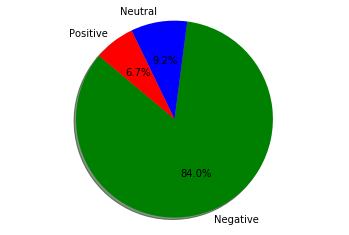

In [416]:
#Set colors by label
colors=["Green","Blue","Red"]

print("\nGOT1 Sentiment Analysis \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


In [417]:
# Sentiment Analysis for GOT2 
print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )
for got2line in got2a:
    #Find sentiment of a line
    if (got2line.isspace()) == False and (len(got2line)) > 40: 
        sentiment = TextBlob(got2line)
        #Print individual sentiments
        print('{:40} :   {: 01.2f}    :   {:01.2f}'.format(got2line[:40]\
                , sentiment.polarity, sentiment.subjectivity) )

Review                                   : Polarity   : Subjectivity
Bantam Spectra hardcover edition publish :    0.00    :   0.00
Bantam Spectra trade paperback edition p :    0.00    :   0.00
Bantam Spectra mass market edition / Mar :    0.00    :   0.00
Library of Congress Catalog Card Number: :    0.00    :   0.00
No part of this book may be reproduced o :    0.14    :   0.45
Bantam Books, the rooster colophon, Spec :   -0.50    :   0.50
THE KING IN THE NORTH THE KING OF THE TR :    0.00    :   0.00
THE BROTHERHOOD WITHOUT BANNERS AN OUTLA :    0.00    :   0.00
A Song of Ice and Fire is told through t :    0.06    :   0.67
In the case of the volume now in hand, t :    0.15    :   0.34
The day was grey and bitter cold, and th :   -0.25    :   0.53
The big black bitch had taken one sniff  :   -0.30    :   0.55
“Seven hells.” He gave the leashes a har :    0.03    :   0.50
Lark the Sisterman stood with his arms c :   -0.43    :   0.61
“We can’t go back emptyhand, Lark,” rumb :    0.0

“I was not born this morning, Lannister. :    0.00    :   0.00
“No, but you’re like to die this afterno :   -0.12    :   0.38
“Not you, ser. If the choice were mine,  :    0.15    :   0.47
The range was less than twenty yards. Th :    0.04    :   0.35
By the time they emerged from the cutoff :    0.21    :   0.40
Ser Cleos raised a shout. When Jaime loo :    0.37    :   0.50
Instead he found himself stretching the  :   -0.42    :   0.82
“I want none of your thanks, Kingslayer. :    0.35    :   0.35
“And you actually mean to keep it?” Jaim :   -0.01    :   0.39
Ser Desmond Grell had served House Tully :    0.24    :   0.55
Her brother Edmure had named Ser Desmond :   -0.12    :   0.38
“Your sons,” Ser Desmond said at last. “ :   -0.60    :   0.67
“We share your grief, my lady,” said Uth :   -0.80    :   0.20
“The news must have driven you mad,” Ser :   -0.71    :   0.60
“I did,” Catelyn said firmly. “I underst :    0.17    :   0.67
“Fetters?” The very word seemed to shock :   -0.07    :

“His Lyseni kept their galleys out in th :   -0.11    :   0.51
“What of Robb Stark, what has he been do :   -0.20    :   0.60
“There’s some of his wolves burning thei :    0.13    :   0.35
The thought of losing Bronn was the fina :    0.00    :   1.00
“You’re not the Hand,” Bronn reminded hi :   -0.11    :   0.88
“What happened to all the men you hired  :    0.00    :   0.00
“Some died at the winch towers. That unc :    0.00    :   0.00
“How good of him,” Tyrion said acidly. “ :    0.19    :   0.64
“Good,” said Tyrion, “because as it happ :    0.70    :   0.60
Bronn laughed. “I know he’s bloody well  :   -0.07    :   0.40
“I owe him a great debt, but how to pay  :    0.37    :   0.75
“He had eyes like a fish and he wore a w :    0.00    :   0.00
“Everything,” said Tyrion, “for a start. :    0.15    :   0.25
“What’s half a nose, on a face like mine :    0.04    :   0.58
“No. She’s coming, though, and the city’ :    0.20    :   0.76
They spit on me, and buy drinks for the  :   -0.23    :

“You ought to thank me for killing your  :    0.00    :   1.00
“Har!” boomed the white-bearded man. “We :    0.00    :   0.00
“Agreed.” Mance Rayder beckoned Jon clos :    0.21    :   0.58
Tormund rose to his feet. “Hold. You gav :    0.60    :   0.95
Mance Rayder laughed. “As you wish. Jon  :    0.70    :   0.20
“That sounds more like me,” said Tormund :    0.50    :   0.50
“The good woman at the brazier,” Mance R :    0.37    :   0.44
“I am no man’s pet,” said Jarl, dark and :   -0.15    :   0.40
“And Val’s no man,” white-bearded Tormun :    0.00    :   0.00
“So there you have us, Jon Snow,” said M :    0.00    :   0.50
“Winterfell,” he said, “by way of Castle :   -0.17    :   0.43
“And what brings you up the Milkwater, s :    0.30    :   0.75
“Five. Three’s dead and the boy’s here.  :   -0.16    :   0.39
Rayder’s eyes met Jon’s again. “Was it o :    0.25    :   0.75
“We were four and the Halfhand. Qhorin w :    0.00    :   0.30
The King-beyond-the-Wall smiled at that. :    0.22    :

When he came up on deck, the long point  :    0.06    :   0.47
Melisandre had been much in his thoughts :    0.17    :   0.36
She would be waiting on Dragonstone as w :    0.06    :   0.43
The captain had been very kind to him. H :    0.16    :   0.51
Dragonstone loomed larger with every str :    0.10    :   0.67
As he listened to the pounding of the oa :    0.12    :   0.16
But that was another lifetime, he though :    0.05    :   0.38
Captain Khorane had told him of the end  :    0.28    :   0.47
Renly’s shade. Davos wondered if his son :    0.50    :   0.50
“Some few,” the captain said. “The queen :    0.26    :   0.32
The mountain grew taller, crowned all in :    0.01    :   0.42
They pulled down the sail as they entere :   -0.16    :   0.29
A fit of coughing seized Davos as he tri :    0.40    :   0.40
“No one goes to the king,” Khorane Sathm :    0.02    :   0.37
Davos was too weak to defy him. He could :   -0.19    :   0.81
Salladhor Saan was not aboard his Valyri :   -0.03    :

“Let me have a taste o’ that gold.” The  :    0.00    :   0.75
“He’s robbing you blind, wench,” Jaime s :   -0.50    :   0.67
“I’ll want provisions too,” Brienne told :    0.00    :   0.00
“There’s more oatcakes.” The man scooped :    0.26    :   0.42
The man frowned at her. “Woman, you don’ :   -0.05    :   0.15
“The moon will be bright tonight,” Brien :    0.40    :   0.50
Their host chewed on that. “If you don’t :    0.60    :   0.60
“That sounds more than fair,” said Ser C :    0.60    :   0.70
“The coverlets is fresh washed, too. My  :    0.30    :   0.50
Ser Cleos was plainly tempted. “A proper :    0.25    :   0.39
“No, coz, the wench is right. We have pr :    0.12    :   0.47
“Then.” When I thought the inn deserted. :    0.19    :   0.46
Brienne frowned at the chain. The man wh :   -0.10    :   0.20
“Yes,” said Jaime, “and the sooner the b :    0.05    :   0.68
He hoped she might strike the irons off  :   -0.11    :   0.42
“Six miles downriver you’ll see a burned :    0.75    :

For once he did not argue. They set off  :    0.09    :   0.57
“We sing real songs in the marches,” Ang :    0.27    :   0.40
“Singing is stupid,” said Arya. “Singing :   -0.35    :   0.47
Tom’s smile said he did not think so. “T :   -0.05    :   0.35
“If there were wolves hereabouts, we’d k :    0.00    :   0.00
“You never knew we were there,” said Gen :    0.00    :   0.00
“Now, lad, you shouldn’t be so certain o :    0.36    :   0.54
Hot Pie shifted his seat. “I know the so :    0.25    :   0.85
Tom ran his fingers down his strings. “T :   -0.11    :   0.24
Hot Pie joined in lustily, even bouncing :    0.25    :   0.65
A small brook flowed into the Trident a  :   -0.13    :   0.41
Tom and Hot Pie resumed their song on th :    0.11    :   0.46
“Gendry,” she called, her voice low and  :    0.00    :   0.30
He looked dubious. “Did you ever sail a  :    0.00    :   0.00
“You put up the sail,” she said, “and th :    0.00    :   0.00
“What if the wind is blowing the wrong w :   -0.50    :

“The last word we had from the north, Se :    0.16    :   0.47
“No,” said Catelyn. “Leave them to guard :    0.47    :   0.47
“How will you get the northmen to the no :   -0.35    :   0.50
“We must win back the Freys,” said Robb. :    0.22    :   0.31
“Not something,” said Catelyn. “Someone. :    0.00    :   0.00
Big enough for you?” Snowflakes speckled :    0.02    :   0.30
The giants swayed slowly atop the mammot :    0.02    :   0.38
Jon took the horse in hand and held him  :    0.01    :   0.31
In Old Nan’s stories, giants were outsiz :   -0.02    :   0.45
They’re not wearing skins, Jon realized. :    0.08    :   0.41
One of the giants coming up on them look :    0.09    :   0.47
“Giants have no kings, no more’n mammoth :   -0.02    :   0.53
“What did you say to him? Was that the O :    0.10    :   0.20
“Aye. I asked him if that was his father :    0.35    :   0.35
Tormund Thunderfist cracked a gap-toothe :    0.15    :   0.22
Jon wheeled and followed Tormund back to :    0.11    :

Arya dashed across brown weedy fields, t :   -0.09    :   0.40
Between two elms she rode, and never pau :    0.01    :   0.44
A stream barred her way. She splashed do :    0.02    :   0.32
Both horses were lathered and flagging b :   -0.15    :   0.33
The look she gave him was full of hurt.  :    0.35    :   0.55
“Lord Eddard’s dead, milady. I belong to :   -0.20    :   0.40
“What brothers?” Old Hullen had fathered :    0.08    :   0.29
“Anguy, Lem, Tom o’ Sevens, Jack and Gre :    0.31    :   0.82
“Yes.” That he was not Robb’s man, she u :   -0.00    :   0.63
“Will you ride back peaceful now,” Harwi :    0.12    :   0.25
“I’ll ride peaceful,” she said sullenly. :    0.25    :   0.50
Sobbing, Sam took another step. This is  :   -0.04    :   0.18
When he looked down he could see them st :   -0.16    :   0.28
It would not stop, the snow. The drifts  :   -0.25    :   0.43
Every fourth or fifth step he had to rea :   -0.07    :   0.33
Sam was stumbling himself. There were ro :   -0.17    :

Tyrion stirred. “She did throw me in a c :    0.13    :   0.64
Mace Tyrell’s smile was jovial, but behi :    0.24    :   0.48
Tyrion pushed off his cushions, bristlin :   -0.04    :   0.46
“Oh, I do,” said Littlefinger, “I have i :    0.80    :   0.40
Lord Rowan looked doubtful. “Would Lady  :   -0.80    :   0.90
“She’s had me a few times before, Lord M :   -0.20    :   0.10
“Bedding,” said Cersei, “is not wedding. :    0.18    :   0.40
“To be sure. It would not have been fitt :    0.26    :   0.80
Tyrion noted the look that passed betwee :    0.27    :   0.70
“My lords,” pronounced the High Septon,  :    0.37    :   0.51
“But can he?” asked Lord Redwyne. “Jon A :    0.00    :   0.00
“Only a boy,” said Littlefinger. “I will :    0.17    :   0.65
Tyrion studied the slender man with the  :   -0.05    :   0.75
“We have no lack of foes,” said Ser Keva :    0.70    :   0.60
Ser Kevan was his brother’s vanguard in  :   -0.02    :   0.41
The sheep were bleating their agreement, :    0.00    :

“Near three hundred riders and twice as  :    0.14    :   0.27
Lost by me. By me, may the gods forgive  :    0.18    :   0.50
“No word of this must leave Riverrun,” h :    0.00    :   0.00
Sansa. Catelyn’s nails dug into the soft :   -0.10    :   0.45
Robb gave Edmure a look that chilled. “W :    0.00    :   0.00
“We need speak no falsehood. Only say no :    0.00    :   1.00
“Until we can bring the murdered dead ba :   -0.12    :   0.45
“I owe their fathers truth,” said Robb.  :   -0.15    :   0.40
“Lord Karstark’s heir was at Harrenhal a :    0.00    :   0.45
“Harrion. His name is Harrion.” Robb lau :    0.53    :   0.33
The Blackfish looked at him shrewdly. “Y :    0.10    :   0.40
“What else would he be? I am about to ki :    0.00    :   0.00
“He might. There are sons who hate their :   -0.80    :   0.90
Robb shook his head. “Even if Harrion we :    0.30    :   0.75
Under that gaze, Edmure’s face reddened. :    0.00    :   0.67
“A hostage?” said Catelyn. It might be b :    1.00    :

“Oh yeth,” said Vargo Hoat. “Half the go :   -0.17    :   0.17
Urswyck shoved him in the back, and a je :    0.18    :   0.56
They mean to scare me. The fool hopped o :   -0.04    :   0.26
Sunlight ran silver along the edge of th :    0.02    :   0.44
The small square keep was half a ruin, a :    0.03    :   0.32
The maester who cared for him was a youn :   -0.03    :   0.31
“Aye, hanged he was, but Thoros cut him  :   -0.17    :   0.27
“And a hard man to find, it would seem,” :   -0.29    :   0.54
The next morning, as they crossed the li :    0.01    :   0.38
“You’d know for certain if there was a s :    0.00    :   0.57
“Lord Lychester’s sons died in Robert’s  :    0.19    :   0.60
“What did the maester mean, about asking :   -0.31    :   0.69
Three days later, as they rode through a :   -0.09    :   0.25
“You’ve not seen Lord Beric?” asked Tom  :    0.00    :   0.00
“He’s dead.” The woman sounded sick. “Th :   -0.46    :   0.63
“That’s an old stale tale, and false,” s :   -0.09    :

“When the day comes that you raise your  :    0.38    :   0.51
The old man hesitated before saying, “Ki :    0.15    :   0.46
“Those same high lords who abandoned my  :    0.08    :   0.33
“Even those who bent their knees may yea :    0.00    :   0.00
“May,” said Dany. That was such a slippe :   -0.03    :   0.50
The slaver shrugged. “Tell her to consid :    0.08    :   0.46
“The corsair wanted only a hundred, your :    0.00    :   1.00
He poked her with the end of the whip. “ :    0.00    :   0.00
Dany knew she would take more than a hun :    0.43    :   0.43
Yet her words did not move the plump per :   -0.00    :   0.62
“Good Master Kraznys would be most pleas :    0.57    :   0.70
“I will feed her jellied dog brains, and :    0.26    :   0.42
“Many delicious dishes can be had here,  :    0.75    :   0.75
“Tell her how pretty the pyramids are at :    0.25    :   1.00
“Astapor is most beautiful at dusk, Your :    0.32    :   0.58
“Ask her if she wishes to view our fight :    0.14    :

Bran closed his eyes to try and see the  :   -0.03    :   0.48
“He passed beneath the Twins by night so :    0.25    :   0.75
“Yes,” said Meera, “but that’s another s :    0.00    :   0.00
“They are,” she agreed, but said no more :    0.11    :   0.54
“Harrenhal!” Bran knew at once. “It was  :    0.00    :   0.00
Meera smiled. “Was it? Beneath its walls :    0.43    :   0.50
Bran knew that feeling well enough. When :   -0.09    :   0.50
“The daughter of the great castle reigne :    0.45    :   0.59
“She was,” said Meera, hopping over a st :    0.00    :   0.00
“This isn’t going to be one of those lov :    0.35    :   0.40
“He likes the stories where the knights  :    0.00    :   0.00
“Sometimes the knights are the monsters, :    0.16    :   0.51
“Were they Walders?” It sounded like som :   -0.19    :   0.50
“None offered a name, but he marked thei :   -0.02    :   0.30
“Two,” said Meera. “The she-wolf laid in :    0.12    :   0.36
“That evening there was to be a feast in :    0.22    :

“Your pretty crown might buy another cen :    0.25    :   1.00
Dany waited for his words to be translat :    0.31    :   0.41
The fat Grazdan turned to the others. Th :    0.34    :   0.37
Two thousand would never serve for what  :   -0.08    :   0.56
There was the sound of indrawn breath fr :    0.50    :   0.30
Whitebeard stared in shocked disbelief.  :    0.05    :   0.60
“You must not presume to instruct me. Se :    0.00    :   0.00
Mormont seized the old man roughly by an :    0.00    :   0.20
“Tell the Good Masters I regret this int :    0.70    :   0.60
She knew the answer, though; she could s :   -0.01    :   0.56
The oldest Grazdan stirred in his seat,  :   -0.19    :   0.54
“All your goods, save your crown and you :    0.00    :   0.00
“Done,” the old Grazdan answered in his  :   -0.10    :   0.34
The others echoed that old man of the pe :    0.10    :   0.20
“The Unsullied will learn your savage to :    0.11    :   0.50
The slave girl rendered his words to her :    0.00    :

“I did, Your Grace,” said Tyrion, “but o :    0.04    :   0.81
Laughter burst from the lips of Ser Osmu :   -0.33    :   0.55
“I am,” the Imp confessed, “but not so d :   -0.04    :   0.67
Red-faced, Sansa went with him from the  :    0.03    :   0.63
For their wedding night, they had been g :    0.27    :   0.68
“Nothing was ever wiser. I am not truly  :   -0.41    :   0.84
Sansa filled a goblet for each of them.  :    0.17    :   0.64
“Tyrion.” He cocked his head. “My name i :    0.00    :   0.00
“Tyrion. My lord. Should I take off my g :    0.00    :   0.00
The Imp turned away from her. “The first :    0.25    :   0.33
“You were wed before? I . . . I had forg :    0.00    :   0.00
“Who was she, my lord?” Sansa was curiou :   -0.10    :   1.00
“Lady Tysha.” His mouth twisted. “Of Hou :   -0.33    :   0.67
Sansa stared down at her hands and said  :   -0.16    :   0.29
“How old are you, Sansa?” asked Tyrion,  :    0.10    :   0.20
“Thirteen,” she said, “when the moon tur :    0.00    :

“You have done good work, Master Mott,”  :    0.70    :   0.60
“I shall, my lord. You are most generous :    0.50    :   0.50
When the guards had seen the armorer out :    0.00    :   0.00
“The steel was sufficient for two blades :   -0.08    :   0.08
Tyrion smiled. “They’d have pleased him  :    0.53    :   0.57
“No doubt. The only blade he ever used w :    0.00    :   1.00
“Mud,” said Tyrion, “and a few dead thin :   -0.06    :   0.43
“You will find whatever gold is required :    0.00    :   0.00
“Will I? Where? The treasury is empty, I :   -0.18    :   0.53
“Extravagance has its uses. We must demo :    0.00    :   0.00
“Then perhaps Casterly Rock should pay.” :    0.00    :   0.00
“Why? I have seen Littlefinger’s account :    0.12    :   0.25
“As are the crown’s expenses. Robert was :   -0.02    :   0.35
“Then perhaps seven courses would suffic :    0.00    :   0.00
“The Tyrells would think us niggardly. I :    0.00    :   0.00
The disgrace of being dismissed after so :    0.00    :

“I’m not a boy! But Mycah was. He was a  :   -0.09    :   0.15
The Hound answered. “Seven hells. The li :   -0.05    :   0.63
“No, you’re dead,” she threw back at him :   -0.10    :   0.20
Harwin took her arm to draw her back as  :    0.00    :   0.00
The big man shrugged. “I was Joffrey’s s :    0.00    :   0.10
“That’s a lie!” Arya squirmed in Harwin’ :    0.00    :   0.00
“Did you see the boy attack Prince Joffr :    0.00    :   0.00
“I heard it from the royal lips. It’s no :    0.37    :   0.71
“Sansa’s just a liar,” Arya said, furiou :    0.00    :   0.00
Thoros drew Lord Beric aside. The two me :    0.00    :   0.30
Beric Dondarrion turned back to the Houn :    0.13    :   0.57
The Hound frowned suspiciously, as if he :    0.00    :   0.00
“Neither. I am a just lord. Prove your i :    0.40    :   0.80
“No,” Arya cried, before Harwin covered  :    0.17    :   0.43
And so he did, a long rasping laugh that :    0.17    :   0.37
“It’s me you’ll face,” said Lord Beric D :    0.00    :

Davos ignored the jibe. “I don’t doubt L :   -0.06    :   0.28
“They are,” insisted Ser Axell. “Not all :    0.00    :   0.00
“When he did,” Davos repeated. “They wer :    0.00    :   0.00
“Every man has choices. They might have  :    0.34    :   0.74
“Some men are stronger than others.” It  :   -0.50    :   1.00
“It is every man’s duty to remain loyal  :    0.08    :   0.48
A desperate folly took hold of Davos, a  :   -0.13    :   0.92
Shocked silence followed, until Ser Axel :   -1.00    :   0.80
Davos could hear Stannis grinding his te :    0.00    :   0.10
“It would please me for you to leave,” s :    0.00    :   0.00
“As you command.” Ser Axell slid the kni :   -0.50    :   1.00
“You have always presumed on my forbeara :    0.43    :   0.83
“I am your man, Your Grace. So it is you :    0.00    :   0.00
“It is,” he said, calmer. “And I would h :   -0.34    :   0.73
“Why would you want it, then?” Davos ask :    0.00    :   0.00
“It is not a question of wanting. The th :   -0.01    :

“He enjoys cutting off hands.” The linen :   -0.60    :   0.90
“Nonetheless, he had one. Hoat is more c :    0.31    :   0.59
“The curse of Harren the Black?” mocked  :   -0.17    :   0.43
“The curse of Tywin Lannister.” Bolton h :    0.00    :   0.10
“There are no Tarbecks or Reynes,” said  :    0.00    :   0.00
“My point precisely. Lord Vargo doubtles :   -0.03    :   0.58
“A noose is kinder than what he’ll get f :    0.00    :   0.00
“By now he has come to the same realizat :   -0.16    :   0.51
“King Robb has won every battle,” Brienn :    0.33    :   0.83
“Won every battle, while losing the Frey :    0.09    :   0.37
“You have no pity for our wretched doome :    0.24    :   0.35
“But to sell you he must keep you, and t :    0.22    :   0.61
“By maiming you, he meant to remove your :   -0.05    :   0.46
I see. “You want me to absolve you of bl :    0.33    :   0.56
There’s something I don’t often hear. “H :   -0.28    :   0.47
“You will leave when Qyburn says you are :    0.31    :

“I could if I wanted!” she snapped at hi :    0.00    :   0.00
Thoros chuckled. “Your brother will pay, :    0.00    :   0.00
“Yes, but what if he won’t?” she insiste :    0.00    :   0.00
Lord Beric sighed. “Then I will send you :    0.11    :   0.57
“Do you swear?” she asked him. Yoren had :   -0.10    :   0.50
“On my honor as a knight,” the lightning :    0.00    :   0.00
It was raining when Lem returned to the  :   -0.17    :   0.27
Finally Tom ran out of rain songs and pu :   -0.05    :   0.58
“I could shoe him for you,” said Gendry, :    0.00    :   0.75
“What are you saying, lad?” asked Harwin :    0.00    :   0.00
“I’ll smith for you.” Gendry went to one :   -0.70    :   0.67
Arya bit her lip. He means to leave me t :    0.00    :   0.00
“You would do better serving Lord Tully  :    0.50    :   0.50
“No one ever did. I want a forge, and fo :    0.00    :   0.50
“A smith can find a welcome most anywher :    0.57    :   0.60
Arya watched Gendry screw up his stupid  :    0.06    :

“Aye, if you like,” she said, and then,  :    0.00    :   0.00
“They say shouting. Might be it’s ghosts :    0.00    :   0.00
The holdfast did have a grim haunted loo :   -0.32    :   0.54
“Swimming? In the storm?” She laughed at :    0.70    :   0.20
“Do I need a trick for that now?” he tea :    0.62    :   0.74
Ygritte punched his arm. “You know nothi :   -0.17    :   0.17
“Half fish, half goat, half horse . . .  :    0.00    :   0.25
She pulled back and gave him a look. “Wa :    0.00    :   0.00
“No sorc—” he began, as a huge bolt of l :    0.18    :   0.59
“Did you look?” Jon asked, as the sound  :    0.12    :   0.42
“Yellow,” she said. “Is that what you me :    0.17    :   0.17
“We call them merlons. They were painted :   -0.05    :   0.40
Across the lake, the tower was black aga :    0.01    :   0.48
“A queen stayed there for a night.” Old  :    0.12    :   0.44
“No one has. The last dragons died a hun :    0.25    :   0.28
“Good Queen Alysanne, they called her la :    0.35    :

Brienne touched his arm. “There are more :    0.50    :   0.50
He saw them too. They were armored all i :   -0.05    :   0.05
Five had been his brothers. Oswell Whent :   -0.31    :   0.33
“You don’t frighten me,” he called, turn :    0.00    :   0.00
“I swore an oath to keep him safe,” she  :    0.50    :   0.50
“We all swore oaths,” said Ser Arthur Da :   -0.50    :   1.00
The shades dismounted from their ghostly :   -0.10    :   0.70
“You swore to keep him safe,” said Whent :    0.50    :   0.50
“And the children, them as well,” said P :    0.00    :   0.00
Prince Rhaegar burned with a cold light, :   -0.06    :   0.35
“I never thought he’d hurt them.” Jaime’ :    0.27    :   0.43
“Cutting his throat,” said Prince Lewyn. :   -0.60    :   0.90
“The king you had sworn to die for,” sai :    0.00    :   0.00
The fires that ran along the blade were  :   -0.08    :   0.50
“No,” he said, “no, no, no. Nooooooooo!” :    0.00    :   0.00
Heart pounding, he jerked awake, and fou :   -0.22    :

Sam ran, puffs of frost exploding from h :   -0.26    :   0.73
“But where?” Gilly hurried after him, ho :   -0.20    :   0.00
“Brother!” The shout cut through the nig :    0.00    :   0.00
He’s wearing blacks. Sam urged Gilly tow :   -0.02    :   0.55
When they reached the top of the ridge a :    0.10    :   0.52
The rain was falling from a black iron s :   -0.04    :   0.31
Arya squirmed in the saddle and felt the :   -0.08    :   0.15
“Is this the Blackwater Rush?” They had  :   -0.20    :   0.95
“It’s a river we need to cross, that’s a :   -0.02    :   0.11
She had chosen to ride, but the first ti :   -0.03    :   0.49
“Why don’t you just kill me like you did :    0.00    :   0.75
He answered by grabbing the front of her :   -0.30    :   0.22
After that, he rolled her in his horse b :    0.16    :   0.39
It has to be the Blackwater, Arya decide :    0.08    :   0.35
“The fords will all be gone,” Sandor Cle :    0.00    :   0.00
There’s no way across, she thought. Lord :   -0.03    :

“No.” Bolton’s voice was soft, but certa :    0.09    :   0.43
“The last thing we need is the Mountain  :    0.00    :   0.07
“Your Grace is too kind. I suffered grie :   -0.20    :   0.70
“Duskendale.” Robb made the word a curse :    0.00    :   0.00
“A folly,” Lord Bolton agreed, “but Glov :   -0.80    :   0.20
Duskendale was done and cold; it was the :   -0.05    :   0.75
His queer colorless eyes studied her fac :   -0.02    :   0.57
“It should be enough,” said Robb. “You w :   -0.16    :   0.59
The outriders came on them an hour from  :   -0.18    :   0.29
“Keep your head down and your mouth shut :    0.18    :   0.45
The big bad-tempered courser wore neithe :   -0.12    :   0.41
The riders split and circled them for a  :   -0.02    :   0.63
“You have business at the Twins?” the kn :    0.00    :   0.00
“Salt pork for the wedding feast, if it  :   -0.16    :   0.31
“Salt pork never pleases me.” The pitchf :    0.05    :   0.54
“M’lady told me to bring him, ser,” Cleg :   -0.05    :

“Be quiet, Cersei. Joffrey, when your en :   -0.04    :   0.50
Joffrey had that sullen, sulky look he g :   -0.03    :   0.43
Oh, my, hasn’t this gotten interesting?  :    0.50    :   0.50
Lord Tywin studied his grandchild in sil :   -0.21    :   0.24
He wrenched free of her. “Why should I?  :    0.26    :   0.57
“Thank you for that wisdom, Your Grace,” :   -0.20    :   0.62
“I don’t want any dreamwine,” Joffrey in :    0.00    :   0.00
Lord Tywin would have paid more heed to  :    0.50    :   0.50
Ser Kevan took Joffrey firmly by the arm :    0.05    :   0.54
“Father, I am sorry,” Cersei said, when  :   -0.50    :   1.00
“There is a long league’s worth of diffe :    0.04    :   0.58
“Not me, I promise you,” said Cersei. “M :    0.50    :   0.50
“The part about you hiding under Casterl :    0.40    :   0.40
“Yes, I recall now,” Cersei said, “Rober :    0.33    :   0.67
“And what were you telling him, pray? I  :    0.00    :   0.00
“Why would he? Robert ignored him. He wo :   -0.29    :

At the top of the steps Davos heard a so :    0.08    :   0.40
“Up here the young fish teach the old fi :    0.01    :   0.40
He found the maester seated at his long  :    0.36    :   0.57
“Good morrow to you, Father,” the boy gr :    0.23    :   0.49
Yet Edric Storm was three inches taller  :    0.10    :   0.45
“Yes, good morrow, my lord,” Edric echoe :    0.75    :   0.80
“Well,” Davos lied. If truth be told, th :    0.00    :   0.00
“We had just finished, my lord,” Maester :    0.00    :   0.00
“We were reading about King Daeron the F :   -0.03    :   0.57
“He worshiped false gods,” said Devan, “ :    0.47    :   0.78
“He was,” agreed Edric Storm, “but my fa :    0.10    :   0.40
The princess looked at him wide-eyed. “D :    0.80    :   0.40
The bastard nodded. “It was when he’d fi :    0.09    :   0.27
Devan looked to Pylos. “Is that how it h :    0.00    :   0.00
“I said so, didn’t I?” Edric Storm said  :    0.80    :   1.00
“Edric, you ought not boast,” Maester Py :    0.19    :

But he was a broken boy with useless leg :   -0.45    :   0.30
She wasn’t really climbing, the way he u :   -0.01    :   0.40
And smaller. It’s almost like the Wall w :   -0.07    :   0.35
“When will she come down?” Bran asked Jo :   -0.16    :   0.29
“When she is ready. She will want to hav :    0.19    :   0.38
“We might find something,” Jojen insiste :    0.00    :   0.00
Or something might find us. Bran couldn’ :    0.00    :   0.00
So they went exploring, Jojen Reed leadi :   -0.03    :   0.38
There were a lot of dark doors in the Ni :   -0.20    :   0.40
“This seems an old place,” Jojen said as :   -0.14    :   0.40
“Twice as old as Castle Black,” Bran sai :    0.11    :   0.43
That was two centuries past, though. Now :   -0.12    :   0.38
“There are ghosts here,” Bran said. Hodo :    0.15    :   0.30
They spent half the day poking through t :    0.02    :   0.47
By the time Meera returned, the sun was  :    0.00    :   0.37
“I saw the haunted forest,” she said in  :    0.06    :

Meereen’s pink-and-white hero tried to a :    0.06    :   0.32
A sudden silence swept along the brick p :    0.00    :   0.50
Oznak leapt clear of his horse and manag :    0.18    :   0.51
“So much for the hero of Meereen,” said  :    0.20    :   0.20
“A victory without meaning,” Ser Jorah c :   -0.40    :   0.40
“No,” Dany agreed, “but I’m pleased we k :    0.15    :   0.50
The defenders on the walls began firing  :   -0.01    :   0.24
The besiegers gave him a raucous welcome :    0.41    :   0.71
“Strong Belwas needs no tinkly bells.” T :    0.29    :   0.52
“You shall have it,” said Dany. “Strong  :    0.09    :   0.34
“It is nothing. I let each man cut me on :    0.04    :   0.71
But Dany had lost Khal Drogo to a simila :   -0.04    :   0.50
“I must have this city,” she told them,  :    0.35    :   0.55
“And fat chests of gold, silver, and gem :    0.00    :   0.00
“I’ve had a look at the landward walls,  :    0.05    :   0.66
“No weakness in the landward walls?” sai :   -0.31    :

“A castle, is it?” Brella had to squint. :   -0.15    :   0.20
Sansa did not want to hear about falling :   -0.10    :   0.25
“No, m’lady,” said Brella. “I have not s :    0.00    :   0.00
“Might be he went to see his father,” Sh :    0.00    :   0.00
Brella gave a sniff. “Lady Sansa, you’ll :    0.35    :   0.65
Sansa let Shae pull her shift up over he :    0.16    :   0.41
Brella sent Shae to fetch more hot water :    0.25    :   0.45
“The water is not hot enough,” Sansa lie :   -0.06    :   0.68
Her maids were dressing her when Tyrion  :    0.60    :   0.68
“There will be wine at the breakfast, my :    0.00    :   0.00
“There’s wine here. You don’t expect me  :    0.16    :   0.31
The Imp’s clothing was soiled and unkemp :    0.36    :   0.65
“The doublet is handsome, yes.” Tyrion p :    0.17    :   0.53
When the Imp returned a short time later :    0.07    :   0.36
“Are purple, gold, and white the colors  :    0.00    :   0.00
“No. I mean, yes.” He blushed. “The colo :    0.05    :

He is going to die, Tyrion realized. He  :   -0.01    :   0.42
Ser Meryn pried the king’s mouth open to :   -0.04    :   0.56
Tyrion found himself thinking of Robb St :    0.22    :   0.54
Margaery Tyrell was weeping in her grand :    0.26    :   0.49
When he heard Cersei’s scream, he knew t :    0.00    :   0.00
I should leave. Now. Instead he waddled  :    0.00    :   0.00
His sister sat in a puddle of wine, crad :   -0.17    :   0.41
The High Septon knelt beside him. “Fathe :    0.16    :   0.41
“He did not choke.” Cersei’s voice was s :   -0.06    :   0.38
“My lady?” said Ser Loras Tyrell, uncert :    0.00    :   0.00
“Arrest my brother,” she commanded him.  :   -0.18    :   0.17
Far across the city, a bell began to tol :    0.10    :   1.00
Sansa felt as though she were in a dream :   -0.20    :   0.40
He had not been dead when she left the t :    0.02    :   0.60
A good heart. I have a good heart. Hyste :    0.01    :   0.45
She found her clothes where she had hidd :   -0.04    :

At the north window, he leaned against t :    0.10    :   0.60
But when he lowered his gaze from the sk :    0.07    :   0.59
The wind sighed through the chamber, and :   -0.15    :   0.42
“Three is three,” came Melisandre’s answ :    0.00    :   0.00
“In the nightfire.” Stannis and Melisand :    0.35    :   0.55
“Your Grace.” Davos stepped forward. “La :    0.07    :   0.53
If the king was surprised to find him at :    0.10    :   0.90
“He choked on a morsel of food at his we :    0.00    :   0.00
“I can count, woman.” Stannis walked alo :    0.12    :   0.38
Stannis ground his teeth. “A dangerous m :   -0.60    :   0.90
“The Lyseni still trade at King’s Landin :    0.00    :   0.00
“I suppose not.” The king ran his finger :   -0.14    :   0.45
“They will not,” said Melisandre. “Joffr :    0.00    :   0.00
“Tommen.” The king said the name grudgin :   -0.60    :   1.00
“They will crown Tommen, and rule in his :    0.00    :   0.00
Stannis made a fist. “Tommen is gentler  :    0.00    :

“Wed?” Sansa was stunned. “You and my au :    0.00    :   0.00
“The Lord of Harrenhal and the Lady of t :    0.00    :   0.00
You said it was my mother you loved. But :    0.20    :   0.68
“So silent, my lady?” said Petyr. “I was :    0.17    :   0.52
“I . . . I pray you will have long years :    0.33    :   0.75
Lothor and old Oswell rowed them ashore. :   -0.10    :   0.34
The two old men waded out up to their th :    0.03    :   0.20
The fat woman laughed. “I can’t rightly  :    0.49    :   0.37
“And all the local lads are grateful, I  :    0.25    :   0.44
“It is good to have you home, my lord,”  :    0.11    :   0.40
“As short a time as possible, Bryen, hav :    0.00    :   0.65
“If we knew you was coming we would have :    0.07    :   0.39
“Nothing says home like the smell of bur :   -0.05    :   0.23
“You did, my lord. You said you’d be get :    0.50    :   0.50
“And very well, I’m sure. No one has mad :    0.16    :   0.51
She had to think a moment. “Three and tw :   -0.18    :

Tyrion stabbed listlessly at a greasy gr :   -0.12    :   0.58
It was not a life he’d ever dreamed of,  :   -0.19    :   0.50
“My lord?” said Podrick Payne. “They’re  :    0.00    :   0.00
“Pod, tell me true . . . do you think I  :    0.35    :   0.65
The boy hesitated. When he tried to spea :   -0.38    :   0.62
I am doomed. Tyrion sighed. “No need to  :    0.60    :   0.55
Ser Addam Marbrand waited at the door wi :    0.27    :   0.44
No sooner had Tyrion taken his place bef :    0.00    :   0.00
A cold hand tightened round his heart. V :   -0.21    :   0.38
“They plotted it together,” she said, th :    0.27    :   0.49
“How could you know all this?” demanded  :    0.00    :   0.50
“I overheard some, m’lord,” said Shae, “ :    0.07    :   0.56
Prince Oberyn looked curious. “What sort :   -0.10    :   1.00
“Unspeakable things.” As the tears rolle :   -0.01    :   0.63
Oswald Kettleblack was the first to laug :    0.14    :   0.56
I saved you all, Tyrion thought. I saved :   -0.40    :

“That wasn’t . . . I was about to say th :    0.00    :   0.00
She came closer, hesitant. “Jaime, did y :   -0.31    :   0.69
Jaime shrugged. “I would have killed Ren :   -0.20    :   0.00
“I’m the bloody Kingslayer, remember? Wh :   -0.25    :   0.38
“You gave her to him?” she cried, dismay :    0.00    :   0.00
“With a sword at my throat, but never mi :   -0.13    :   0.33
“You heard me. My lord father found some :   -0.06    :   0.29
Brienne shook her head. “When Lord Bolto :   -0.40    :   0.60
“Oh, he knows. Lannisters lie, remember? :   -0.20    :   0.50
“Why would you tell me all this, if it’s :    0.35    :   0.65
The Hand’s secrets, he thought. I no lon :    0.10    :   0.53
The wench’s mouth got stubborn. “I will  :    0.40    :   0.88
“Two trials, actually. Words and swords  :   -0.37    :   0.37
“My cell faces the sea. I heard the shou :    0.00    :   0.00
“Prince Oberyn of Dorne is dead, Ser Gre :   -0.18    :   0.42
Brienne looked at him. “You do not belie :    0.00    :

Sandor said, “The Blackfish is still in  :    0.00    :   0.00
“Not for long,” said Polliver. “He’s und :    0.06    :   0.48
The Hound poured a cup of wine for Arya  :   -0.13    :   0.62
“They’ll find her,” said Polliver. “If i :   -0.17    :   0.17
“A pretty girl, I hear,” said the Tickle :    0.40    :   0.62
“And courteous,” the Hound agreed. “A pr :   -0.10    :   0.62
“They found her too,” said Polliver. “Th :    0.00    :   0.00
Arya sipped her wine so they could not s :    0.38    :   0.29
“What’s so bloody funny?” asked Polliver :   -0.28    :   0.95
The Hound never flicked an eye at Arya.  :    0.00    :   0.00
“Saltpans? How should I know? The trader :   -0.10    :   0.40
The Tickler leaned forward. “Would you p :    0.00    :   0.00
The Tickler shrugged, straightened, and  :   -0.07    :   0.47
Arya took a step backward as the long st :    0.02    :   0.34
Polliver was a grim, methodical fighter, :   -0.25    :   0.60
Sandor gave a grunt of pain. The burned  :    0.02    :

“Varys, you are as cold and slimy as a s :    0.20    :   0.65
The eunuch sighed. “The faithful dog is  :   -0.05    :   0.43
Tyrion snorted. “Unwary? I’m the wariest :    0.50    :   0.70
“I have found no trace of Lady Sansa in  :   -0.13    :   0.56
That’s no lie, at least. Tyrion waddled  :   -0.45    :   0.70
“Maegor the Cruel decreed four levels of :   -0.04    :   0.36
Tyrion hung back a moment. Varys had alr :   -0.01    :   0.30
On the other hand, what choice did he ha :    0.01    :   0.24
Jaime would not be afraid, he thought, b :    0.00    :   0.59
A light appeared ahead of them, too dim  :    0.11    :   0.55
The juncture was otherwise empty, but on :   -0.00    :   0.32
“Yes.” Frozen hinges screamed in protest :    0.00    :   0.50
Tyrion walked slowly to the ladder, ran  :   -0.30    :   0.40
He looked up the shaft. “How far must I  :    0.10    :   1.00
“My lord, you are too weak for such foll :   -0.19    :   0.56
“Two hundred and thirty rungs, but whate :    0.00    :

“His lordship was destroying the castle, :   -0.20    :   0.00
“A giant,” the boy whispered, weeping. “ :   -0.45    :   0.76
“My lord, your blood needs thinning,” sa :   -0.60    :   0.83
They led the boy away. My lord husband,  :   -0.01    :   0.50
“Those are only stories,” she said, and  :    0.00    :   0.50
Back in her bedchamber, Sansa took off h :    0.17    :   0.30
Sansa would have welcomed banishment. Th :    0.13    :   0.43
I will tell my aunt that I don’t want to :    0.10    :   0.57
It was late that afternoon when Lady Lys :   -0.07    :   0.57
Marillion was comely, there was no denyi :    0.19    :   0.61
“Thank you,” Sansa told him stiffly. “I  :   -0.21    :   0.50
He would not leave. “My lady said to bri :    0.00    :   0.00
Bring me? She did not like the sound of  :    0.40    :   0.40
“Do you require guarding?” Marillion sai :    0.22    :   0.78
I am a Stark of Winterfell, she longed t :   -0.06    :   0.48
Two guards in sky-blue cloaks flanked th :    0.04    :

—his brother, {SER BURTON CRAKEHALL}, ki :   -0.20    :   0.00
—his son and heir, SER TYBOLT CRAKEHALL, :    0.00    :   0.00
—his second son, SER LYLE CRAKEHALL ; ca :    0.10    :   0.30
—his youngest son, SER MERLON CRAKEHALL, :    0.00    :   0.00
—{ANDROS BRAX}, Lord of Hornvale, drowne :   -0.10    :   0.10
—his brother, {SER RUPERT BRAX}, slain a :    0.00    :   0.00
—his eldest son, SER TYTOS BRAX, now Lor :    0.20    :   0.60
—his second son, {SER ROBERT BRAX}, slai :    0.00    :   0.00
—his third son, SER FLEMENT BRAX, now he :    0.00    :   0.00
—{LORD LEO LEFFORD}, drowned at the Ston :   -0.10    :   0.10
—REGENARD ESTREN, Lord of Wyndhall, a ca :    0.20    :   0.60
—GAWEN WESTERLING, Lord of the Crag, a c :    0.20    :   0.60
—his wife, LADY SYBELL, of House Spicer, :    0.00    :   0.00
—LORD ANTARIO JAST, a captive at Pinkmai :    0.20    :   0.60
—his sons, SER DENNIS PLUMM, SER PETER P :    0.00    :   0.00
—QUENTEN BANEFORT, Lord of Banefort, a c :    0.20    :

In [418]:

#Categorize each line in GOT2 
for got2ine in got2a:
    sentiment = TextBlob(got2line)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
print("Final summarized counts :", values)

Final summarized counts : [36204, 1598, 1160]



GOT2 Sentiment Analysis 
-------------------


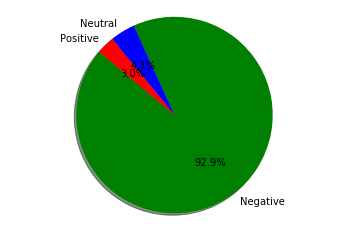

In [419]:
#Set colors by label
colors=["Green","Blue","Red"]

print("\nGOT2 Sentiment Analysis \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()